## DBSCAN (Gürültülü Uygulamaların Yoğunluğa Dayalı Konumsal Kümelenmesi) Nedir?

DBSCAN algoritması, “kümeler” ve “gürültü” kavramına dayanmaktadır. Ana fikir, bir kümenin her noktası için, belirli bir yarıçapın komşusunun en az minimum sayıda nokta içermesi gerektiğidir.

#### DBSCAN nasıl çalışır?

DBSCAN, 2 parametre kullanır:

- minPts: Bir bölgenin yoğun olarak kabul edilebilmesi için birlikte kümelenen minimum nokta sayısı (bir eşik).
- eps (ε): Herhangi bir noktanın komşuluğundaki noktaları bulmak için kullanılacak bir mesafenin ölçüsü.

Algoritma, veri kümesindeki bir noktayı (tüm noktalar ziyaret edilene kadar) keyfi olarak alarak ilerler.

Noktaya ‘ε’ yarıçapında en az ‘minPoint’ noktaları varsa, o zaman tüm bu noktaları aynı kümenin parçası olarak kabul edilir.

Daha sonra, her komşu nokta için komşuluk hesaplamasını tekrarlayarak kümeler genişletilir.

DBSCAN'ın çalışma prensibi:

#### DBSCAN'ın avantajları:

- Önceden küme sayısı bilinmesine gerek yoktur.
- Farklı şekil ve büyüklüklerde kümeleri tespit edebilir.
- Gürültüye karşı dayanıklıdır.
- Basit ve anlaşılır bir algoritmadır.

#### DBSCAN'ın dezavantajları:

- ε ve MinPoints parametrelerinin seçimi kritik önem taşır.
- Yüksek boyutlu verilerde performansı düşebilir.
- Uzun ve karmaşık kümeleri iyi modellemeyebilir.

#### DBSCAN'ın kullanım alanları:

- Müşteri segmentasyonu
- Sosyal ağ analizi
- Biyoinformatik
- Görüntü işleme

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/dbscan/dbscan-gif.gif?raw=true" width="500"/>


### DBSCAN Örnek Uygulama



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
import math

#### Gerekli kütüphaneleri import ediyoruz

In [2]:
def make_circle(r, n, noise = 30, seed = 1234):
  np.random.seed(seed)
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]

#### İç içe dairler şeklinde rastgele veriler üretiyoruz.

<Axes: xlabel='x', ylabel='y'>

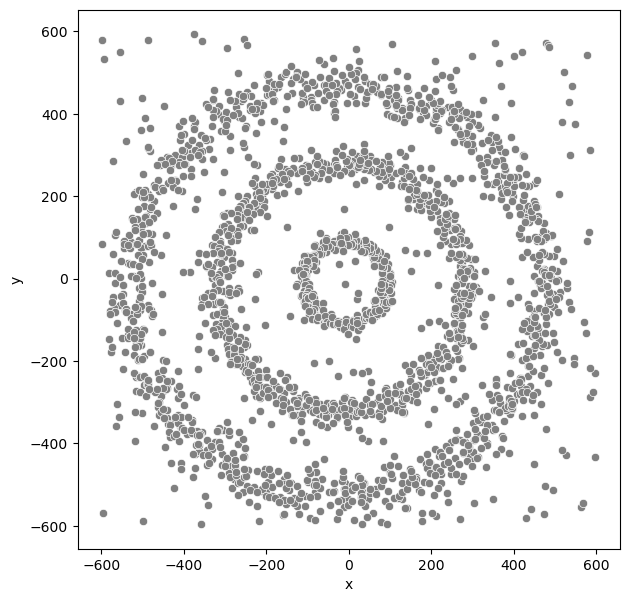

In [3]:
def arrray_to_df(arr, i):
  df = pd.DataFrame(arr)
  df['cluster'] = str(i)
  return df

data = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]

data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']

plt.rcParams['figure.figsize'] = [7,7]
sns.scatterplot(
    data = data, 
    x = 'x',
    y = 'y',
    color='gray'
)

#### Ürettiğimiz veriyi görselleştiriyoruz.
#### DBSCAN Modelini ürettiğimiz veri ile eğitiyoruz.

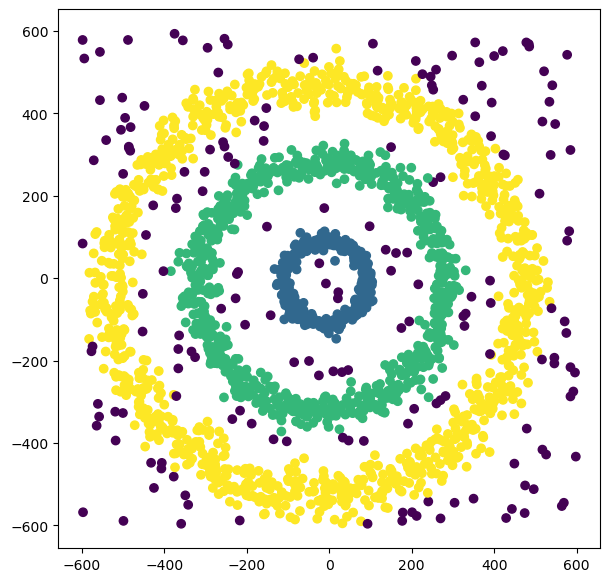

In [4]:
data['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['x', 'y']])

plt.rcParams['figure.figsize'] = [7,7]

plt.scatter(
    data['x'],
    data['y'],
    c = data['dbscan']
)

#### Görüldüğü gibi DBSCAN algoritması karmaşık şekillerdeki verileri de başarılı bir şekilde kümeleyebilmektedir.